In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv('../data/flightPrice.csv')
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955


In [35]:
data.describe()

,Duration_in_hours,Days_left,Fare
count,452088.000000,452088.000000,452088.000000
mean,12.349222,25.627902,22840.100890
std,7.431478,14.300846,20307.963002
min,0.750000,1.000000,1307.000000
25%,6.583300,13.000000,8762.750000
50%,11.333300,26.000000,13407.000000
75%,16.500000,38.000000,35587.000000
max,43.583300,50.000000,143019.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    452088 non-null  object 
 1   Journey_day        452088 non-null  object 
 2   Airline            452088 non-null  object 
 3   Flight_code        452088 non-null  object 
 4   Class              452088 non-null  object 
 5   Source             452088 non-null  object 
 6   Departure          452088 non-null  object 
 7   Total_stops        452088 non-null  object 
 8   Arrival            452088 non-null  object 
 9   Destination        452088 non-null  object 
 10  Duration_in_hours  452088 non-null  float64
 11  Days_left          452088 non-null  int64  
 12  Fare               452088 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 44.8+ MB


In [37]:
data.shape

(452088, 13)

In [38]:
# Convert 'Date_of_journey' to datetime
data['Date_of_journey'] = pd.to_datetime(data['Date_of_journey'])

# Extract day of the week and month from 'Date_of_journey'
data['Weekday'] = data['Date_of_journey'].dt.day_name()
data['Month'] = data['Date_of_journey'].dt.month
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Weekday,Month
0,2023-01-16,Monday,SpiceJet,SG-8169,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5335,Monday,1
1,2023-01-16,Monday,Indigo,6E-2519,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.3333,1,5899,Monday,1
2,2023-01-16,Monday,GO FIRST,G8-354,Economy,Delhi,After 6 PM,non-stop,Before 6 AM,Mumbai,2.1667,1,5801,Monday,1
3,2023-01-16,Monday,SpiceJet,SG-8709,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.0833,1,5794,Monday,1
4,2023-01-16,Monday,Air India,AI-805,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.1667,1,5955,Monday,1


In [39]:
encoder = LabelEncoder()
categorical_columns = ['Airline', 'Class', 'Source', 'Destination', 'Departure', 'Arrival']
for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Weekday,Month
0,2023-01-16,Monday,6,SG-8169,1,3,2,non-stop,2,6,2.0833,1,5335,Monday,1
1,2023-01-16,Monday,5,6E-2519,1,3,2,non-stop,3,6,2.3333,1,5899,Monday,1
2,2023-01-16,Monday,4,G8-354,1,3,2,non-stop,3,6,2.1667,1,5801,Monday,1
3,2023-01-16,Monday,6,SG-8709,1,3,2,non-stop,2,6,2.0833,1,5794,Monday,1
4,2023-01-16,Monday,0,AI-805,1,3,2,non-stop,2,6,2.1667,1,5955,Monday,1


In [40]:
print(data['Total_stops'].unique())

['non-stop' '1-stop' '2+-stop']


In [41]:
data['Total_stops'] = data['Total_stops'].map({'non-stop': 0, '1-stop': 1, '2+-stop': 2})
data['Weekday'] = data['Weekday'].map({
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
})
data.head()

,Date_of_journey,Journey_day,Airline,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Weekday,Month
0,2023-01-16,Monday,6,SG-8169,1,3,2,0,2,6,2.0833,1,5335,1,1
1,2023-01-16,Monday,5,6E-2519,1,3,2,0,3,6,2.3333,1,5899,1,1
2,2023-01-16,Monday,4,G8-354,1,3,2,0,3,6,2.1667,1,5801,1,1
3,2023-01-16,Monday,6,SG-8709,1,3,2,0,2,6,2.0833,1,5794,1,1
4,2023-01-16,Monday,0,AI-805,1,3,2,0,2,6,2.1667,1,5955,1,1


In [42]:
data.isnull().sum()

Date_of_journey      0
Journey_day          0
Airline              0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
Weekday              0
Month                0
dtype: int64

In [43]:
data.dtypes

Date_of_journey      datetime64[ns]
Journey_day                  object
Airline                       int32
Flight_code                  object
Class                         int32
Source                        int32
Departure                     int32
Total_stops                   int64
Arrival                       int32
Destination                   int32
Duration_in_hours           float64
Days_left                     int64
Fare                          int64
Weekday                       int64
Month                         int32
dtype: object

In [44]:
X = data.drop(columns=['Fare', 'Flight_code', 'Journey_day', 'Date_of_journey'])
y = data['Fare']

In [45]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [46]:
# Train a Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [47]:
# Validate the model
y_val_pred = model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
print('Validation MSE:', val_mse)
# Calculate R^2 for validation set
y_val_r2 = r2_score(y_val, y_val_pred)
print('Validation R^2:', y_val_r2)


Validation MSE: 34309979.86443614
Validation R^2: 0.9171095561803398


In [48]:
# Test the model
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print('Test MSE:', test_mse)
# Calculate R^2 for test set
y_test_r2 = r2_score(y_test, y_test_pred)
print('Test R^2:', y_test_r2)


Test MSE: 34342640.1783385
Test R^2: 0.9163433564089676


# regularization/gridsearchcv

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [51]:
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print('Best Parameters:', grid_search.best_params_)
print('Best R^2 Score:', grid_search.best_score_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R^2 Score: 0.9343405120148613


In [52]:
# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10, random_state=42)

In [58]:
# Predict on the test set with the best model
y_pred_best = best_model.predict(X_test)

In [59]:
# Calculate the R^2 value for the best model
r2_best = r2_score(y_test, y_pred_best)
print('R^2 Value (Best Model):', r2_best)

R^2 Value (Best Model): 0.9398560535208201


# feature importance analysis

In [60]:
# Get feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

print(feature_importances_df)

              Feature  Importance
1               Class    0.822137
7   Duration_in_hours    0.075322
8           Days_left    0.028948
2              Source    0.018355
6         Destination    0.018039
0             Airline    0.016378
3           Departure    0.006970
5             Arrival    0.006023
9             Weekday    0.005187
4         Total_stops    0.002431
10              Month    0.000209


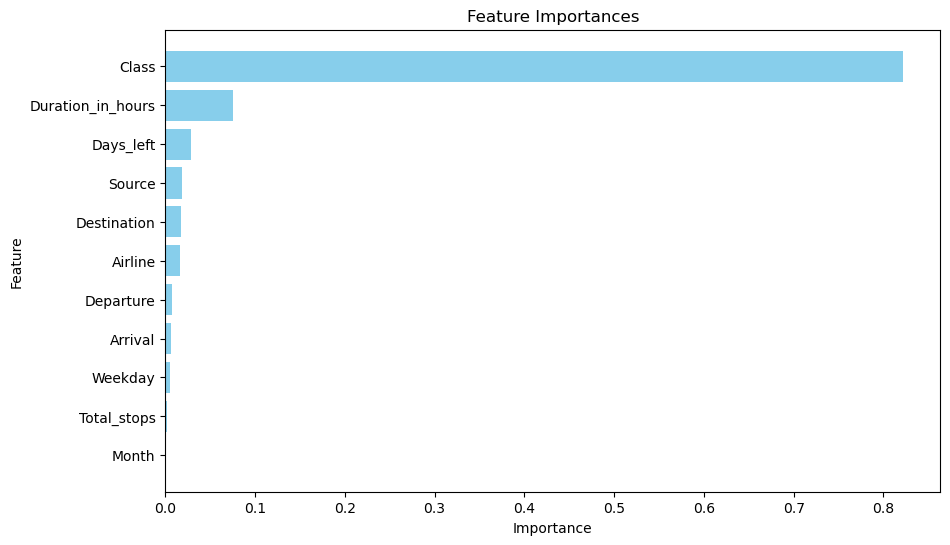

In [61]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [62]:
# Select the top features based on feature importance
# Let's select the top 5 features for this example
num_top_features = 5
top_features = feature_importances_df['Feature'].head(num_top_features).tolist()

# Create a new dataset with only the top features
X_top_features = X[top_features]

# Split the data into training and testing sets
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

print('Top features selected:', top_features)
print('Shape of new feature set:', X_top_features.shape)

Top features selected: ['Class', 'Duration_in_hours', 'Days_left', 'Source', 'Destination']
Shape of new feature set: (452088, 5)


In [63]:
# Import necessary libraries for model evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Train a new Decision Tree Regressor using the selected features
model_top_features = DecisionTreeRegressor(random_state=42)
model_top_features.fit(X_train_top, y_train_top)

# Make predictions
y_pred_top = model_top_features.predict(X_test_top)

# Evaluate the model
mse_top = mean_squared_error(y_test_top, y_pred_top)
r2_top = r2_score(y_test_top, y_pred_top)

print('Mean Squared Error (Top Features):', mse_top)
print('R^2 Score (Top Features):', r2_top)

Mean Squared Error (Top Features): 56239442.109833755
R^2 Score (Top Features): 0.8637171432640174


In [64]:
# Import necessary libraries for model evaluation
from sklearn.metrics import mean_squared_error, r2_score
best_model.fit(X_train_top, y_train_top)

# Make predictions
y_pred_top = best_model.predict(X_test_top)

# Evaluate the model
mse_top = mean_squared_error(y_test_top, y_pred_top)
r2_top = r2_score(y_test_top, y_pred_top)

print('Mean Squared Error (Top Features):', mse_top)
print('R^2 Score (Top Features):', r2_top)

Mean Squared Error (Top Features): 37348337.396602385
R^2 Score (Top Features): 0.9094952239247355


# pruning the base model

In [65]:
# Calculate the cost complexity pruning path
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
# Ensure ccp_alpha values are non-negative
ccp_alphas = [alpha for alpha in ccp_alphas if alpha >= 0]

In [ ]:
# Train decision trees using different values of ccp_alpha
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    models.append(model)

In [ ]:
# Evaluate the models
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Train', drawstyle='steps-post')
plt.plot(ccp_alphas, test_scores, marker='o', label='Test', drawstyle='steps-post')
plt.xlabel('ccp_alpha')
plt.ylabel('R^2 Score')
plt.title('Effect of Pruning on Decision Tree Regressor')
plt.legend()
plt.show()

In [ ]:
# Find the best ccp_alpha
best_ccp_alpha = ccp_alphas[test_scores.index(max(test_scores))]
print('Best ccp_alpha:', best_ccp_alpha)

In [ ]:
# Train the best model with the best ccp_alpha
pruned_model = DecisionTreeRegressor(random_state=42, ccp_alpha=best_ccp_alpha)
pruned_model.fit(X_train, y_train)

# Predict on the test set with the pruned model
y_pred_pruned = pruned_model.predict(X_test)

# Calculate the R^2 value for the pruned model
r2_pruned = r2_score(y_test, y_pred_pruned)
print('R^2 Value (Pruned Model):', r2_pruned)